In [ ]:
!pip install --upgrade pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/gym_churn_us.csv")

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## EDA

No value which are null

In [ ]:
df.isnull().sum()

,0
gender,0
near_location,0
partner,0
promo_friends,0
phone,0
contract_period,0
group_visits,0
age,0
avg_additional_charges_total,0
month_to_end_contract,0


there is no duplicates

In [ ]:
df.duplicated().sum()

0

Heatmap

<Axes: >

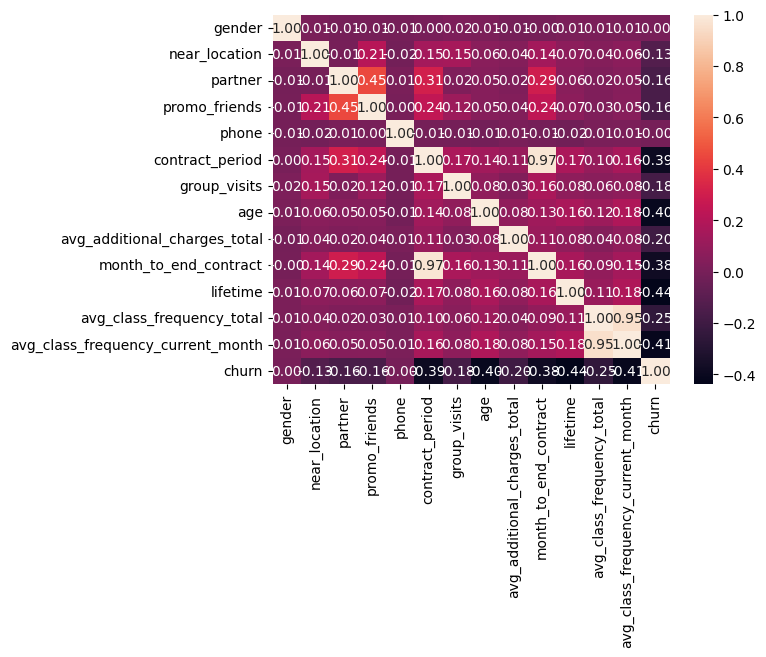

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')

 overview of customer retention

Text(0.5, 1.0, 'Pie chart')

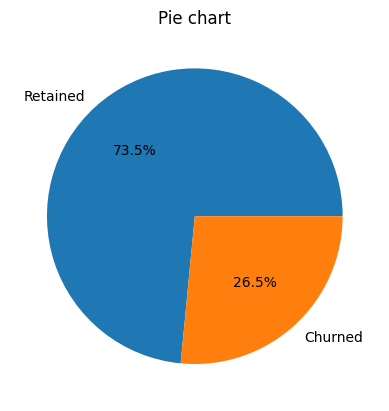

In [ ]:
target = 'churn'
label=['Retained', 'Churned']
churn_counts = df[target].value_counts()
plt.pie(churn_counts,labels=label,autopct='%1.1f%%')
plt.title("Pie chart")

Distribution of age with respect to churn


The bottom part (skyblue) represents the number of retained customers.
The top part (orange) represents the number of churned customers.

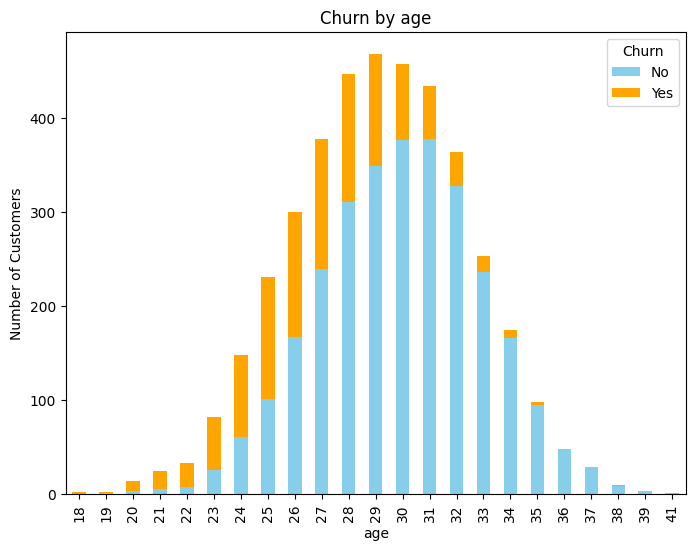

In [ ]:
lifetime_churn = df.groupby(['age', target]).size().unstack()
lifetime_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Churn by age')
plt.xlabel('age')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')
plt.show()


average churn rate for customers with a specific lifetime value

<Axes: xlabel='lifetime', ylabel='churn'>

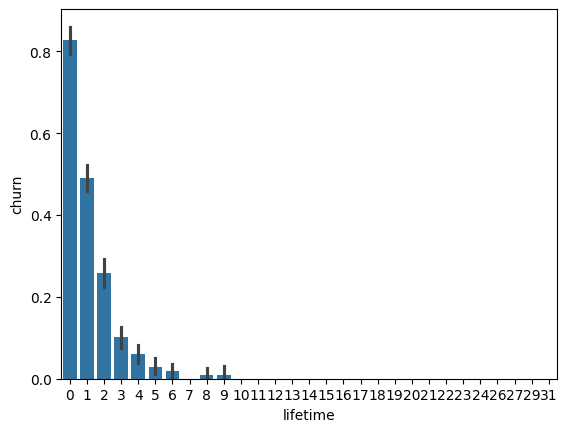

In [ ]:
sns.barplot(x=df['lifetime'],y=df['churn'],data=df)

total count of customers for each gender

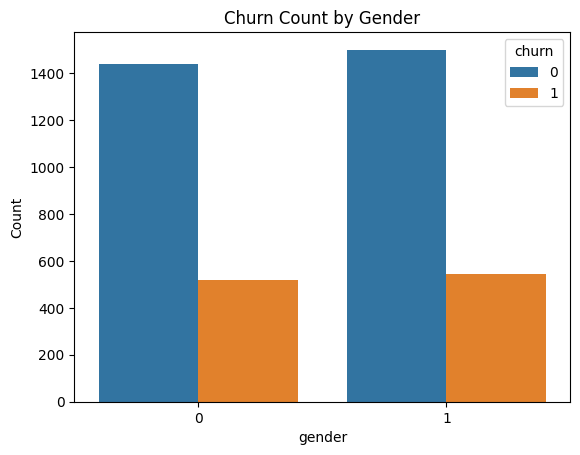

In [ ]:
sns.countplot(x=df['gender'], hue=df['churn'], data=df)
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.show()


number of churned and retained customers for each contract period

Text(0.5, 1.0, 'contract period and chrun')

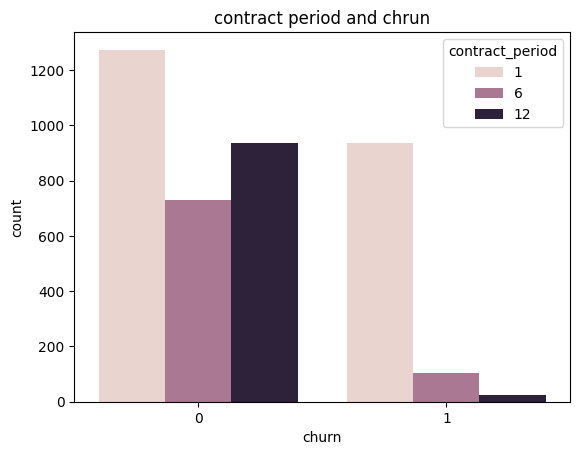

In [ ]:
sns.countplot(x=df['churn'],hue=df["contract_period"])
plt.title("contract period and chrun")

In [ ]:
df["churn"].value_counts()

,count
churn,
0,2939
1,1061


# model creation

In [ ]:
df_new=df.copy()

In [ ]:
x=df.drop(columns="churn")
y=df["churn"]

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#minmax=MinMaxScaler()
#x_scaled=minmax.fit_transform(x)

MODEL SPLITING

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [ ]:
x_test.shape

(1200, 13)

## MODEL CREATION

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
from sklearn.metrics import classification_report

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(max_iter=2000)
le.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred=le.predict(x_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       897
           1       0.88      0.83      0.85       303

    accuracy                           0.93      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.93      0.93      0.93      1200



HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import 	GridSearchCV


In [ ]:
param_grid = {
    'C': [0.1, 1, 10,100,1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_search = RandomizedSearchCV(le,param_distributions=param_grid,n_iter=100,cv=5, scoring='accuracy', random_state=42)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_s

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       897
           1       0.88      0.82      0.85       303

    accuracy                           0.93      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.92      0.93      0.92      1200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
ada_classifier = AdaBoostClassifier(random_state=777)

ada_classifier.fit(x_train, y_train)

AdaBoostClassifier(random_state=777)

In [ ]:
    y_pred = ada_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Metrics for {label}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Metrics for ['Retained', 'Churned']:
Accuracy: 0.9192
Precision: 0.9189
Recall: 0.9192
F1-Score: 0.9190

Confusion Matrix:
[[850  47]
 [ 50 253]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       897
           1       0.84      0.83      0.84       303

    accuracy                           0.92      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.92      0.92      0.92      1200



In [ ]:
import pickle

In [ ]:
le_new=LogisticRegression(solver='liblinear', penalty='l1', C=100)
le_new.fit(x_train,y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
y_pred=le_new.predict(x_test)

In [ ]:
y_pred = le_new.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Metrics for {label}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Metrics for ['Retained', 'Churned']:
Accuracy: 0.9258
Precision: 0.9249
Recall: 0.9258
F1-Score: 0.9251

Confusion Matrix:
[[861  36]
 [ 53 250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       897
           1       0.87      0.83      0.85       303

    accuracy                           0.93      1200
   macro avg       0.91      0.89      0.90      1200
weighted avg       0.92      0.93      0.93      1200



In [ ]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [ ]:
dict2={'model':le_new }


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(le_new, file)


In [ ]:
dict2['zip']

In [ ]:
with open('model.pkl','rb') as obj2:
  a=pickle.load(obj2)


In [ ]:
a

LogisticRegression(C=100, penalty='l1', solver='liblinear')